Environment: wrangler

# <font color = 'purple'>Data Exploration & Cleaning

In this notebook, we clean the raw dataset, and explore the various attributes and their relevance in predicting heart disease

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

In [3]:
#set default style for plots
sns.set_style("whitegrid")
matplotlib.rcParams.update({'font.size': 8})

#set working directory
os.chdir(r"C:\Users\sharo\Documents\Postgrad\My Data Science Portfolio\Classification - Heart Disease")

## <font color='blue'> Import Raw Data

Source: [Kaggle Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

**Attribute Information**
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [4]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## <font color = 'blue'> Data Cleaning

**Remove Duplicates**

In [5]:
df.duplicated().any()

False

**Check for invalid values/ structural errors**

In [6]:
df.info() #check that data types match documentation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# check values of categorical attributes
df_cat = df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']]

for col in df_cat.columns:
    print(f'\nColumn: {col}')
    print(df[col].value_counts())



Column: Sex
M    725
F    193
Name: Sex, dtype: int64

Column: ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Column: FastingBS
0    704
1    214
Name: FastingBS, dtype: int64

Column: RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

Column: ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64

Column: ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

Column: HeartDisease
1    508
0    410
Name: HeartDisease, dtype: int64


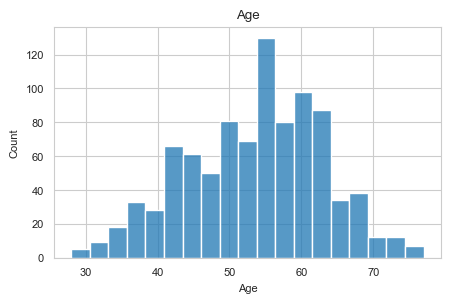

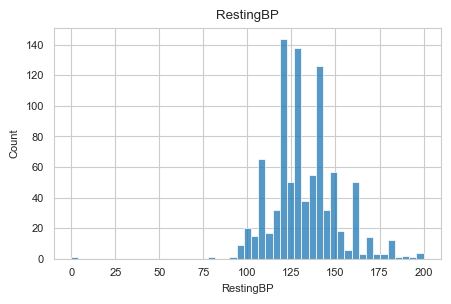

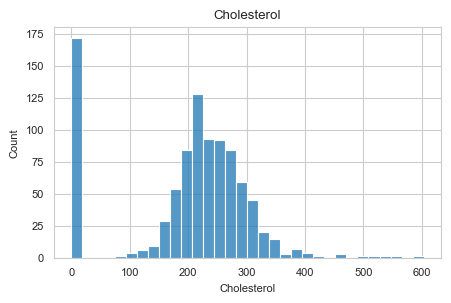

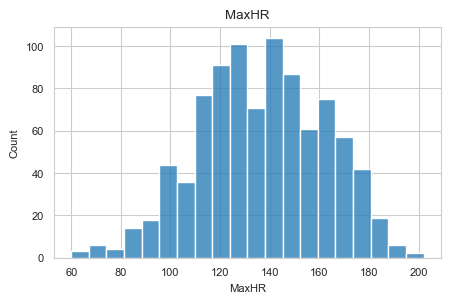

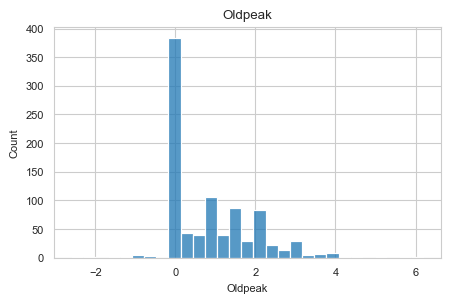

In [8]:
# check for outliers/ possible errors in numerical attributes
df_num = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

for col in df_num.columns:
    fig, ax = plt.subplots(figsize=(5,3))
    sns.histplot(data=df_num, x=df_num[col])
    ax.set_title(col)

In [9]:
# Resting BP has an outlier value: RestingBP=0 which is clearly errorneous unless this person is dead...
print(df[['RestingBP']].sort_values('RestingBP', ascending=True))

# We could fill the value with the mean/median restingBP, but since it's just 1 datapoint, remove it
df_2 = df.drop(index=449).reset_index(drop=True)

     RestingBP
449          0
314         80
227         92
692         94
832         94
..         ...
759        192
399        200
732        200
241        200
365        200

[918 rows x 1 columns]


- There are a large number of data points with Cholesterol=0 which is also most likely error.
- See notebooks 1a and 1b for attempts to fill these missing values using Linear Regression and KNN. 
- Both methods were less accurate than just using the mean. Hence, we will fill the missing values with the mean.

In [11]:
mean_cholesterol = int(df_2[df_2.Cholesterol>0].Cholesterol.mean())
df_3 = df_2.copy()
for i in range(len(df_3)):
    if df_3.Cholesterol[i]==0:
        df_3.Cholesterol[i]=mean_cholesterol

print(f"new min = {min(df_3.Cholesterol)}")

new min = 85


**Check for missing values**

In [12]:
df_3.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [13]:
# reorder colums: numeric followed by categorical
dfex = df_3[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 
             'ST_Slope', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'HeartDisease']]

### Save Cleaned Data

In [14]:
**STOP!! DO NOT OVERWRITE FILE**
dfex.to_csv("heart_clean.csv", index=False)

## <font color = 'blue'> Data Exploration

In [15]:
dfex.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,HeartDisease
0,40,140,289,172,0.0,Up,M,ATA,0,Normal,N,0
1,49,160,180,156,1.0,Flat,F,NAP,0,Normal,N,1
2,37,130,283,98,0.0,Up,M,ATA,0,ST,N,0
3,48,138,214,108,1.5,Flat,F,ASY,0,Normal,Y,1
4,54,150,195,122,0.0,Up,M,NAP,0,Normal,N,0


**Age**   
Patients with heart disease were older on average than those who did not.

<AxesSubplot:xlabel='Age', ylabel='Density'>

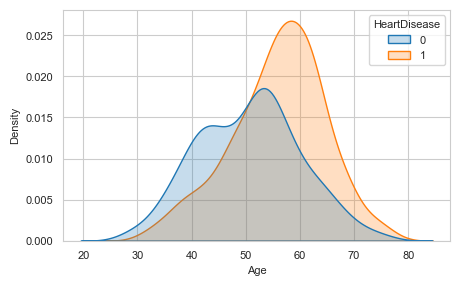

In [16]:
fig, ax = plt.subplots(figsize=(5,3))
sns.kdeplot(data=dfex, x="Age", hue='HeartDisease', fill=True)

**Sex**
63% of males had heart disease as compared to 26% of females

In [17]:
sex_HD = pd.DataFrame(dfex[['Sex', 'HeartDisease']].value_counts()).reset_index().rename(columns={0:'count'})
sex_HD = sex_HD.pivot(index='Sex', columns='HeartDisease',values='count',).reset_index()
sex_HD['pct_hd'] = round(sex_HD[1]/(sex_HD[0]+sex_HD[1])*100,0)

sex_HD.head()

HeartDisease,Sex,0,1,pct_hd
0,F,143,50,26.0
1,M,267,457,63.0


**Blood Pressure and Cholesterol**   

<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

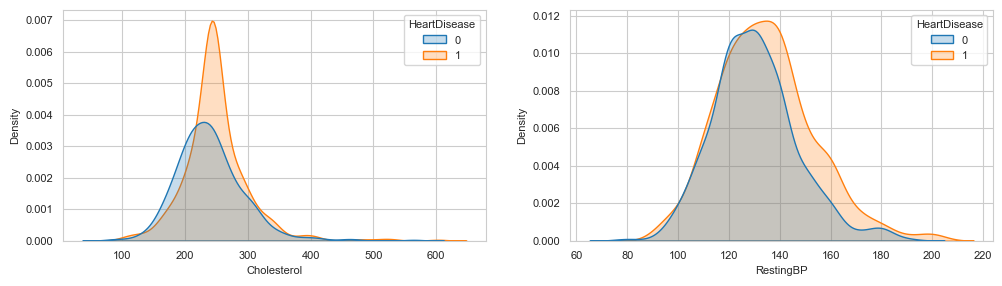

In [18]:
fig, [ax1, ax2] = plt.subplots(figsize=(12,3), ncols=2)
sns.kdeplot(data=dfex, x="Cholesterol", hue='HeartDisease', fill=True, ax=ax1)
sns.kdeplot(data=dfex, x="RestingBP", hue='HeartDisease', fill=True, ax=ax2)

From the kde plot above, we do see patients with heart disease having slightly higher resting BP and cholesterol. The significance of these attributes is more clearly seen when compared against recommended thresholds for BP and cholesterol as shown in the bar charts below. Patients with systolic blood pressure higher than 130 mmHG and total cholesterol higher than 240 mg/dL had significantly higher risk of heart disease.

[BP Source](https://www.cdc.gov/bloodpressure/about.htm#:~:text=%2F80%20mmHg.%E2%80%9D-,What%20are%20normal%20blood%20pressure%20numbers%3F,less%20than%20120%2F80%20mmHg.&text=No%20matter%20your%20age%2C%20you,pressure%20in%20a%20healthy%20range.);  [Cholesterol Source](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Here%20are%20the%20ranges%20for,or%20above%20240%20mg%2FdL)

  RestingBP Cholesterol  HeartDisease
0      High        High             0
1      High      Normal             1
2      High        High             0
3      High     At Risk             1
4      High      Normal             0


<AxesSubplot:xlabel='RestingBP', ylabel='count'>

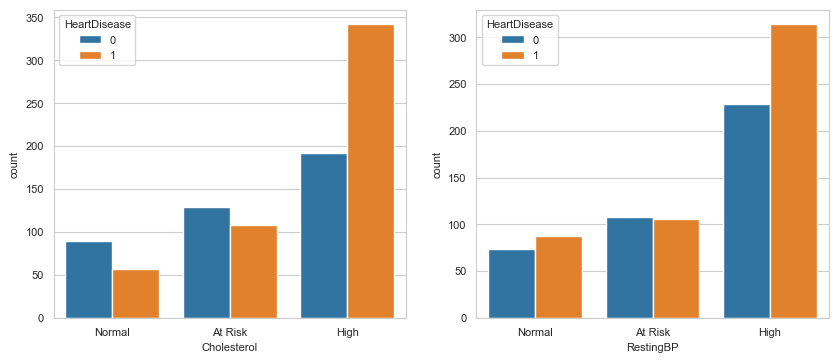

In [19]:
bp_chol = dfex[['RestingBP', 'Cholesterol', 'HeartDisease']]
for i in range(len(bp_chol)):
    if bp_chol.loc[i, 'RestingBP']<120:
        bp_chol.loc[i, 'RestingBP']='Normal'
    elif bp_chol.loc[i, 'RestingBP']<130:
        bp_chol.loc[i, 'RestingBP']='At Risk'
    else:
        bp_chol.loc[i, 'RestingBP']='High'
        
    if bp_chol.loc[i, 'Cholesterol']<200:
        bp_chol.loc[i, 'Cholesterol']='Normal'
    elif bp_chol.loc[i, 'Cholesterol']<240:
        bp_chol.loc[i, 'Cholesterol']='At Risk'
    else:
        bp_chol.loc[i, 'Cholesterol']='High'
        
print(bp_chol.head())

fig, [ax1, ax2] = plt.subplots(figsize=(10,4), ncols=2)

sns.countplot(data=bp_chol, x='Cholesterol', hue='HeartDisease', order=['Normal','At Risk', 'High'],
     palette = {0:'tab:blue',1:'tab:orange'}, ax=ax1)
sns.countplot(data=bp_chol, x='RestingBP', hue='HeartDisease', order=['Normal','At Risk', 'High'],
     palette = {0:'tab:blue',1:'tab:orange'}, ax=ax2)

**MaxHR**   
This refers to the maximum heart rate achieved during exercise, typically during a treadmill test. 

<AxesSubplot:xlabel='MaxHR', ylabel='Density'>

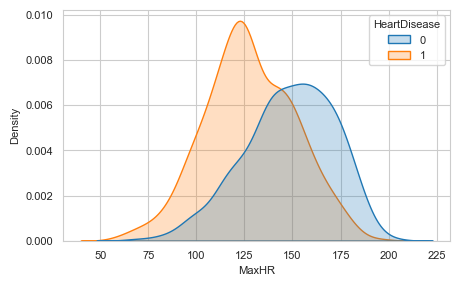

In [20]:
fig, ax = plt.subplots(figsize=(5,3))
sns.kdeplot(data=dfex, x="MaxHR", hue='HeartDisease', fill=True)

In the plot above we see that patients with heart disease on average had lower MaxHR. Scientific papers on the topic corroborate this, adding that the normal range for MaxHR is dependent on other attributes including age, systolic blood pressure, glucose tolerance, cholesterol level and exercise ECG findings. In particular, the CDC has a recommended MaxHR range for intensive physical activity. [Source 1](https://pubmed.ncbi.nlm.nih.gov/8574463/); [Source 2](https://www.ahajournals.org/doi/full/10.1161/01.cir.93.8.1520); [Source 3](https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm#:~:text=You%20can%20estimate%20your%20maximum,beats%20per%20minute%20(bpm))

Here we plot maxHR and Heart Disease alongside age, and the CDC recommended range

Age


<AxesSubplot:xlabel='MaxHR_check', ylabel='count'>

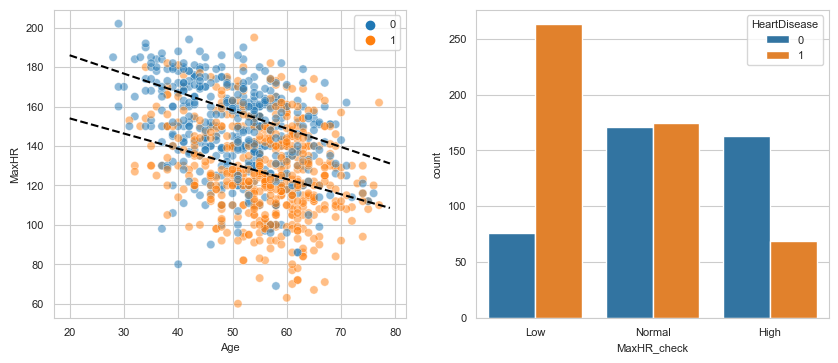

In [21]:
print('Age')
fig, [ax1, ax2] = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
sns.scatterplot(data=dfex, x='Age', y='MaxHR', hue='HeartDisease', alpha=0.5, ax=ax1)

# cdc recommended range
x = np.arange(20,80)
y1 = (220-x)*0.77
y2 = (220-x)*0.93
sns.lineplot(x=x, y=y1, ax=ax1, color='black', linestyle='dashed')
sns.lineplot(x=x, y=y2, ax=ax1, color='black', linestyle='dashed')

age_hr = dfex[['Age', 'MaxHR', 'HeartDisease']]
age_hr['adjustedHR'] = 220-age_hr['Age']
age_hr['MaxHR_check'] = 'Normal'
for i in range(len(age_hr)):
    if age_hr.loc[i,'MaxHR']<0.77*age_hr.loc[i,'adjustedHR']:
        age_hr.loc[i,'MaxHR_check']='Low'
    elif age_hr.loc[i,'MaxHR']>0.93*age_hr.loc[i,'adjustedHR']:
        age_hr.loc[i,'MaxHR_check']='High'
age_hr.drop(columns='adjustedHR',inplace=True)
age_hr.head()

sns.countplot(data=age_hr, x='MaxHR_check', hue='HeartDisease', order=['Low', 'Normal', 'High'])

- Patients with **lower** than the recommended maxHR predominantly had heart disease. 
- Patients in the **normal** range of maxHR were equally likely to have or not have heart disease
- Patients with **higher** than the recommended maxHR predominantly did not have heart disease

**Oldpeak & ST_Slope**   
These are related features pertaining to ECG readings taken while the patient is exercising.

<AxesSubplot:xlabel='ST_Slope', ylabel='Oldpeak'>

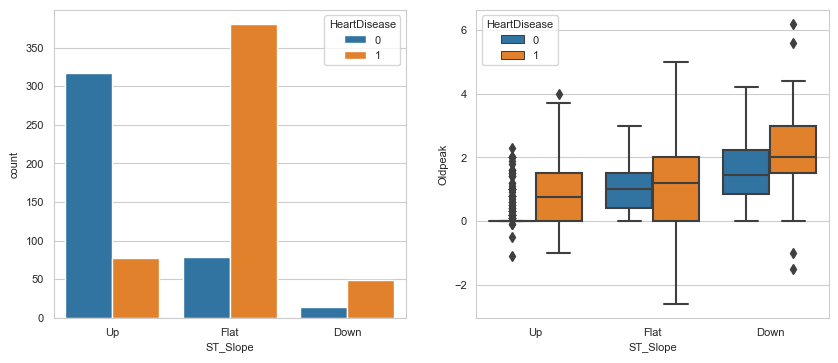

In [20]:
fig, [ax1, ax2] = plt.subplots(figsize=(10,4), ncols=2)
sns.countplot(data=dfex, x='ST_Slope', hue='HeartDisease', ax=ax1)
sns.boxplot(data=dfex, x="ST_Slope", y="Oldpeak", hue='HeartDisease', ax=ax2)

- Patients with **flat and downward** ST slopes predominantly had heart disease.
- Patients with **upward** ST slopes predominantly did not have heart disease, particularly if their Oldpeak readings were close to 0.
- In general, higher Oldpeak values were associated with heart disease, but this seems to be a less distinguishing factor and should be considered in conjunction with ST_Slope

**Chest Pain Type**

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

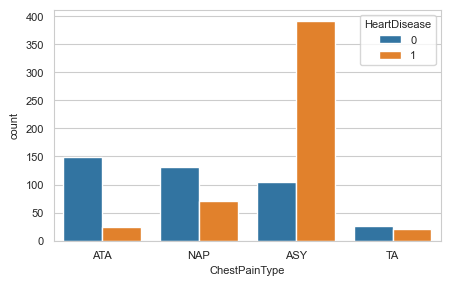

In [21]:
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data=dfex, x="ChestPainType", hue='HeartDisease')

Asymptomatic (ASY) patients (i.e. no chest pain) predominantly had heart disease, whereas majority those which reported various types of chest pain did not have heart disease.

This is quite counter-intuitive and it not clear why this is so. One possibility is that the data collection method is biased towards asymptomatic patients. However, this does not explain why the patients which did report chest pain mostly did not have heart disease. 

In a real-world scenario this would certainly be something to investigate further by looking into the data collection method and consulting medical professionals. The presence of bias in the data collection method may limit the accuracy of any models trained using this dataset.

**FastingBS**   
Patients with elevated fasting blood sugar (indicative of diabetes) predominantly had heart disease. Diabetes is a well known risk factor for heart failure. Over time, high blood sugar can damage blood vessels and the nerves that control your heart, and also increases your vulnerability to other risk factors like high BP and cholesterol. [Source](https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html)

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

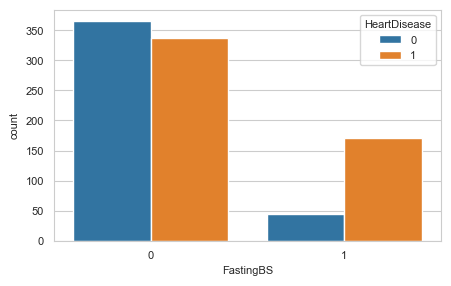

In [22]:
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data=dfex, x="FastingBS", hue='HeartDisease')

**Resting ECG**   
Abnormalities in patients' resting ECG results, in particular ST-T wave abnormality is indicative of heart disease

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

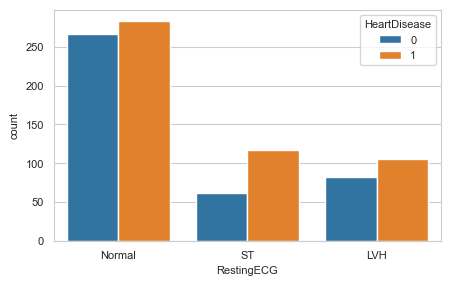

In [23]:
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data=dfex, x="RestingECG", hue='HeartDisease')

**Exercise-induced Angina**   
This refers to chest pain experienced during exercise, and is a significant indicator of heart disease.

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

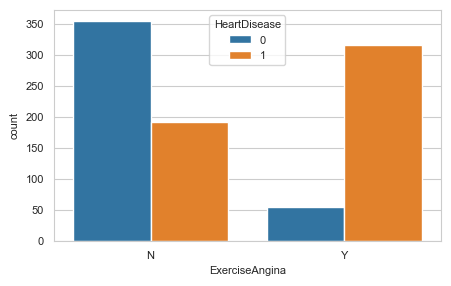

In [24]:
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data=dfex, x="ExerciseAngina", hue='HeartDisease')